In [1]:
import sys, ast, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from math import sqrt , exp
generic = lambda x: ast.literal_eval(x)
%matplotlib inline
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
import GeneralPlot as gp , Initiation as init, plot_tools as pt

# cardigraphic plot definition

In [2]:
def plot_cardiographic_plot( density , R = 2 , dR = 0.1 ):

    with sns.axes_style("white"):
        g = sns.JointGrid(x=density['Sample No.'], y=density['Nprotons'],
                          xlim=(0,len(density)),
                          ylim=(density['Nprotons'].min()-1,density['Nprotons'].max()+1))
        g.ax_marg_x.hist(density['Sample No.'],histtype='step',linewidth=0.01)
        g.ax_marg_y.hist(density['Nprotons'], orientation="horizontal",color='blue')
        g.plot_joint(sns.regplot,color='blue')
        g.set_axis_labels('configuration','# protons')
        g.fig.suptitle('protons, %.2f < R < %.2f fm'%(R-dR,R+dR),fontsize=20)


        g = sns.JointGrid(x=density['Sample No.'], y=density['Nneutrons'],
                          xlim=(0,len(density)),
                          ylim=(density['Nneutrons'].min()-1,density['Nneutrons'].max()+1))
        g.ax_marg_x.hist(density['Sample No.'],histtype='step',linewidth=0.01)
        g.ax_marg_y.hist(density['Nneutrons'], orientation="horizontal",color='red')
        g.plot_joint(sns.regplot,color='red')  
        g.set_axis_labels('configuration','# neutrons')
        g.fig.suptitle('neutrons, %.2f < R < %.2f fm'%(R-dR,R+dR),fontsize=20)


        g = sns.JointGrid(x=density['Sample No.'], y=density['NNucleons'],
                          xlim=(0,len(density)),
                          ylim=(density['NNucleons'].min()-1,density['NNucleons'].max()+1))
        g.ax_marg_x.hist(density['Sample No.'],histtype='step',linewidth=0.01)
        g.ax_marg_y.hist(density['NNucleons'], orientation="horizontal",color='black')
        g.plot_joint(sns.regplot,color='black')  
        g.set_axis_labels('configuration','# Nucleons')
        g.fig.suptitle('Nucleons, %.2f < R < %.2f fm'%(R-dR,R+dR),fontsize=20)

# load data
take Massimo configuations and add some variables, that are generated using 

python mac/calc_massi_configurations.py --option=read -evf=0.001 -p1 -v3

In [3]:
configurations = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k.csv')

In [23]:
nuclei = []
for i in xrange(int(frac*len(configurations.groupby('nucleus_counter')))):
    nucleus = configurations[configurations.nucleus_counter==i]
    nuclei.append(nucleus)
    if (i%1000==0): print 'i:',i
print 'done, len(nuclei):',len(nuclei)

i: 0
i: 100
i: 200
i: 300
i: 400
i: 500
i: 600
i: 700
i: 800
i: 900
i: 1000
i: 1100
i: 1200
i: 1300
i: 1400
i: 1500
i: 1600
i: 1700
i: 1800
i: 1900
i: 2000
i: 2100
i: 2200
i: 2300
i: 2400
i: 2500
i: 2600
i: 2700
i: 2800
i: 2900
i: 3000
i: 3100
i: 3200
i: 3300
i: 3400
i: 3500
i: 3600
i: 3700
i: 3800
i: 3900
i: 4000
i: 4100
i: 4200
i: 4300
i: 4400
i: 4500
i: 4600
i: 4700
i: 4800
i: 4900
i: 5000
i: 5100
i: 5200
i: 5300
i: 5400
i: 5500
i: 5600
i: 5700
i: 5800
i: 5900
i: 6000
i: 6100
i: 6200
i: 6300
i: 6400
i: 6500
i: 6600
i: 6700
i: 6800
i: 6900
i: 7000
i: 7100
i: 7200
i: 7300
i: 7400
i: 7500
i: 7600
i: 7700
i: 7800
i: 7900
i: 8000
i: 8100
i: 8200
i: 8300
i: 8400
i: 8500
i: 8600
i: 8700
i: 8800
i: 8900
i: 9000
i: 9100
i: 9200
i: 9300
i: 9400
i: 9500
i: 9600
i: 9700
i: 9800
i: 9900
done, len(nuclei): 10000


NN-distances data. Takes a lot of time to read so don't use by default...

In [3]:
# pp_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_pp.csv')
# pn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_pn.csv')
# nn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_nn.csv')
# NN_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_NN_all.csv')

In [3]:
R = np.linspace(0,14,100)
R_0_p , a_p , Np = 6.68  , 0.447 , 82
R_0_n , a_n , Nn = 6.7 , 0.55 , 126
rho_0 = 0.16 
rho_WS_p = [rho_0*(float(Np)/(Np+Nn))/(1+exp((R[i]-R_0_p)/a_p)) for i in range(len(R))]
rho_WS_n = [rho_0*(float(Nn)/(Np+Nn))/(1+exp((R[i]-R_0_n)/a_n)) for i in range(len(R))]
rho_WS_all = [rho_WS_p[i] + rho_WS_n[i] for i in range(len(R))]

# single - body
lets look on the single-body density as a function of the distance from the center of the nucleus

normalization: 17056.0


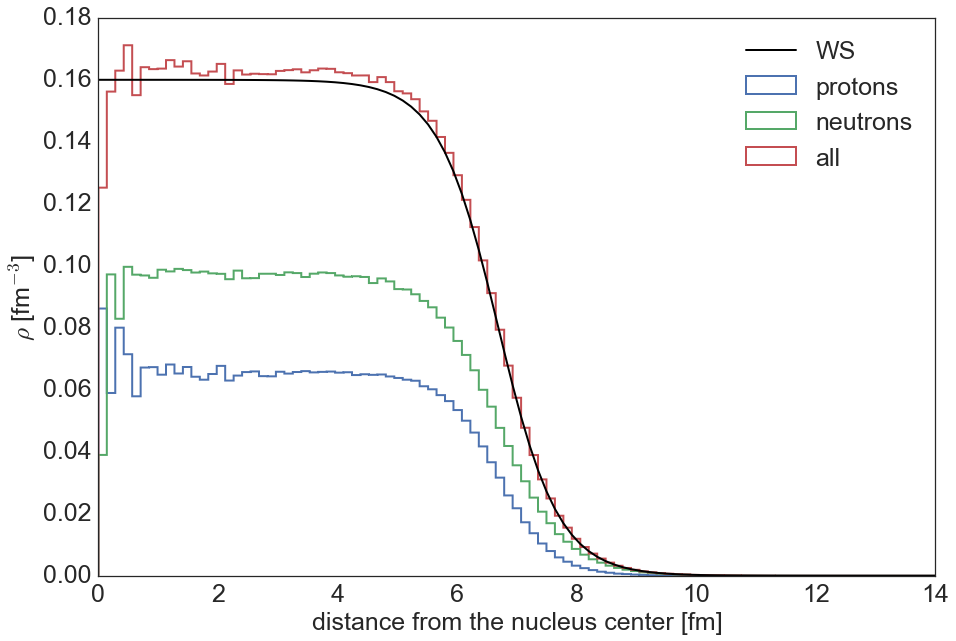

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
neutrons , protons = configurations[configurations['type']=='proton'] , configurations[configurations['type']=='neutron']
N = len(configurations)/float(len(configurations.groupby('nucleus_counter')))*82
print 'normalization:',N
bins = np.linspace(0,14,100)
hp,bins,_ = plt.hist(neutrons.R , weights=1./(N*neutrons.R*neutrons.R) , bins=bins, histtype='step' , label='protons',linewidth=2);
hn,bins,_ = plt.hist(protons.R , weights=1./(N*protons.R*protons.R) , bins=bins, histtype='step', label='neutrons',linewidth=2);
hN,bins,_ = plt.hist(configurations.R , weights=1./(N*configurations.R*configurations.R) , bins=bins, histtype='step', label='all',linewidth=2);
plt.plot(R , rho_WS_all , label='WS', color='black',linewidth=2);
pt.set_axes(ax,'distance from the nucleus center [fm]','$\\rho$ [fm$^{-3}$]')
plt.legend(fontsize=25)

In [26]:
# normalization
integrand_p = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hp[i] for i in range(len(bins)-1)]
print "protons:",sum(integrand_p)
integrand_n = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hn[i] for i in range(len(bins)-1)]
print "neutrons:",sum(integrand_n)
integrand_N = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hN[i] for i in range(len(bins)-1)]
print "nucleons:",sum(integrand_N)

 protons: 82.8314201772
neutrons: 127.350667762
nucleons: 210.182087939


# two - body
collect all nucleons from each nucleus and calculate the inter-nucleon distances

normalization: 17056.0


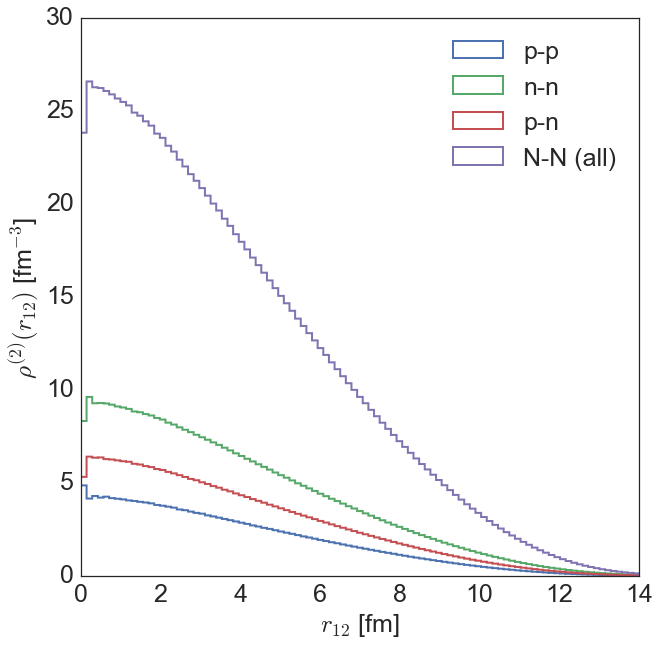

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
N = len(configurations)/float(len(configurations.groupby('nucleus_counter')))*82
print 'normalization:',N
bins = np.linspace(0,14,100)
plt.hist(pp_distances['r(pp)'] , weights=1./(N*pp_distances['r(pp)']*pp_distances['r(pp)']) , bins=bins, histtype='step' , label='p-p',linewidth=2);
plt.hist(nn_distances['r(nn)'] , weights=1./(N*nn_distances['r(nn)']*nn_distances['r(nn)']) , bins=bins, histtype='step' , label='n-n',linewidth=2);
plt.hist(pn_distances['r(pn)'] , weights=1./(N*pn_distances['r(pn)']*pn_distances['r(pn)']) , bins=bins, histtype='step' , label='p-n',linewidth=2);
plt.hist(NN_distances['r(NN)'] , weights=1./(N*NN_distances['r(NN)']*NN_distances['r(NN)']) , bins=bins, histtype='step' , label='N-N (all)',linewidth=2);

pt.set_axes(ax,'$r_{12}$ [fm]','$\\rho^{(2)} (r_{12})$ [fm$^{-3}$]')
plt.legend(fontsize=25)

In [36]:

def produce_cardiographic_plot( R = 2 , dR = 0.1 , frac = 0.01):
    sample_no , Np , Nn , NN = [] , [] , [] , []
    print 'running on %.2f < R < %.2f fm, taking %.3f of the configurations'%(R-dR,R+dR,frac)
    i = 0
    for nucleus in nuclei:
        Nucleons = nucleus[np.abs(nucleus.R - R)<dR]
        Nprotons = len(Nucleons[Nucleons.type=='proton'])
        Nneutrons = len(Nucleons[Nucleons.type=='neutron'])
        NNucleons = len(Nucleons)

        sample_no.append(i)
        Np.append(Nprotons)
        Nn.append(Nneutrons)
        NN.append(NNucleons)
        if ((i%1000)==0): 
            print 'nucleus:',i
        i = i+1
    density = pd.DataFrame( {'Sample No.':sample_no , 'Nprotons':Np , 'Nneutrons':Nn , 'NNucleons':NN} )
    print 'done, returning.'
    return density 

In [37]:
dR , frac  = 0.1 , 1
density_2fm = produce_cardiographic_plot( R = 2 , dR = dR , frac = frac )
density_4fm = produce_cardiographic_plot( R = 4 , dR = dR , frac = frac )
density_6fm = produce_cardiographic_plot( R = 6 , dR = dR , frac = frac )
density_8fm = produce_cardiographic_plot( R = 8 , dR = dR , frac = frac )

running on 1.90 < R < 2.10 fm, taking 1.000 of the configurations
nucleus: 0
nucleus: 1000
nucleus: 2000
nucleus: 3000
nucleus: 4000
nucleus: 5000
nucleus: 6000
nucleus: 7000
nucleus: 8000
nucleus: 9000
done, returning.
running on 3.90 < R < 4.10 fm, taking 1.000 of the configurations
nucleus: 0
nucleus: 1000
nucleus: 2000
nucleus: 3000
nucleus: 4000
nucleus: 5000
nucleus: 6000
nucleus: 7000
nucleus: 8000
nucleus: 9000
done, returning.
running on 5.90 < R < 6.10 fm, taking 1.000 of the configurations
nucleus: 0
nucleus: 1000
nucleus: 2000
nucleus: 3000
nucleus: 4000
nucleus: 5000
nucleus: 6000
nucleus: 7000
nucleus: 8000
nucleus: 9000
done, returning.
running on 7.90 < R < 8.10 fm, taking 1.000 of the configurations
nucleus: 0
nucleus: 1000
nucleus: 2000
nucleus: 3000
nucleus: 4000
nucleus: 5000
nucleus: 6000
nucleus: 7000
nucleus: 8000
nucleus: 9000
done, returning.


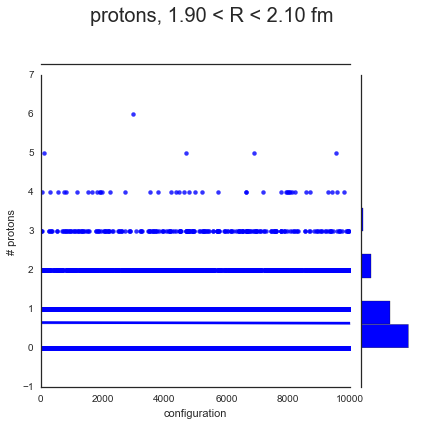

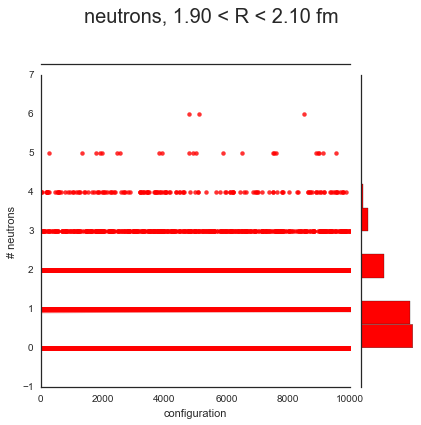

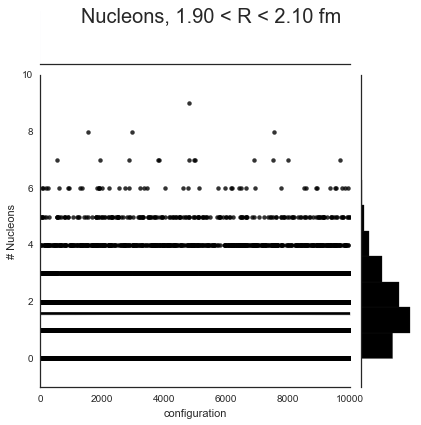

In [38]:
plot_cardiographic_plot( density_2fm , 2 , 0.1 )

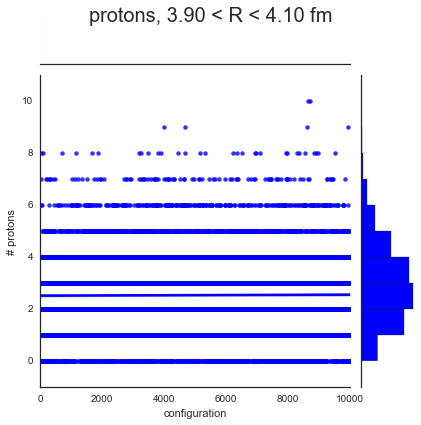

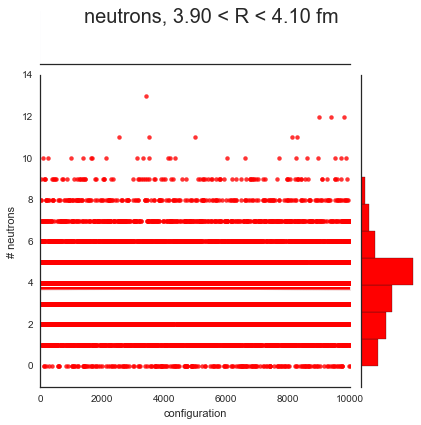

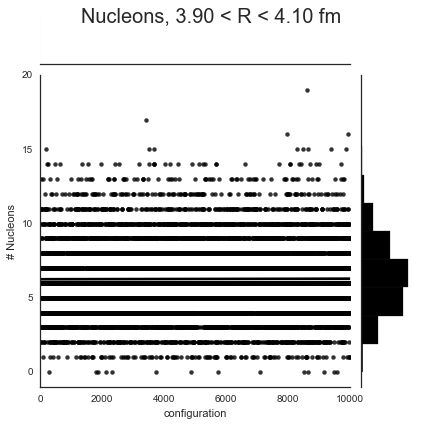

In [39]:
plot_cardiographic_plot( density_4fm , 4 , 0.1 )

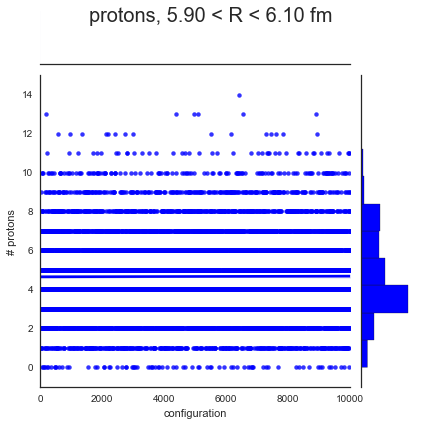

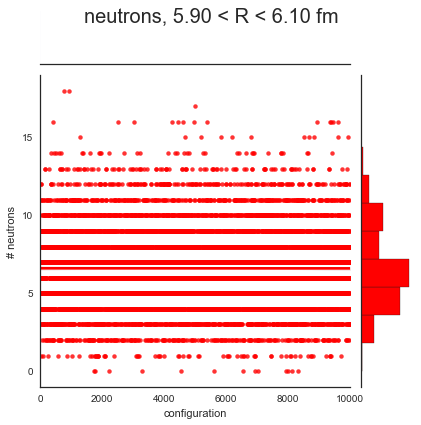

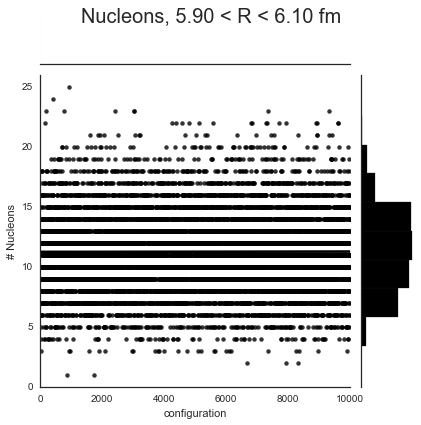

In [40]:
plot_cardiographic_plot( density_6fm , 6 , 0.1 )

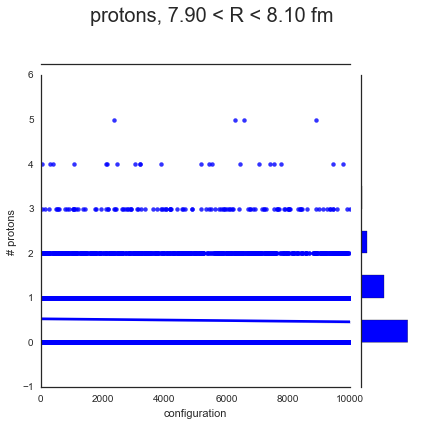

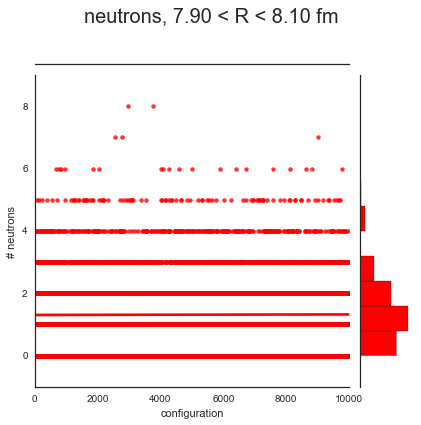

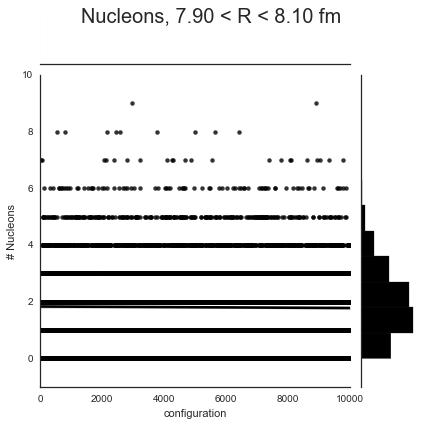

In [41]:
plot_cardiographic_plot( density_8fm , 8 , 0.1 )

In [42]:
density_2fm.to_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_density_2fm.csv')
density_4fm.to_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_density_4fm.csv')
density_6fm.to_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_density_6fm.csv')
density_8fm.to_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico0-skin-10k_density_8fm.csv')

In [43]:
density_2fm_001 = produce_cardiographic_plot( R = 2 , dR = 0.01 , frac = 1 )

running on 1.99 < R < 2.01 fm, taking 1.000 of the configurations
nucleus: 0
nucleus: 1000
nucleus: 2000
nucleus: 3000
nucleus: 4000
nucleus: 5000
nucleus: 6000
nucleus: 7000
nucleus: 8000
nucleus: 9000
done, returning.


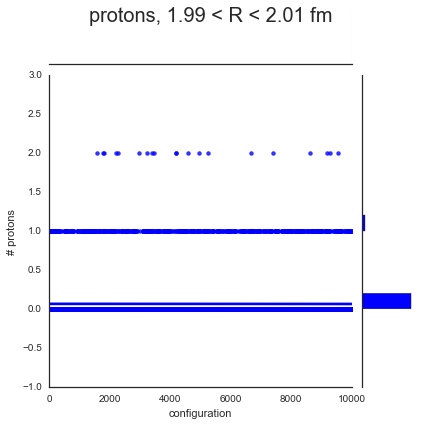

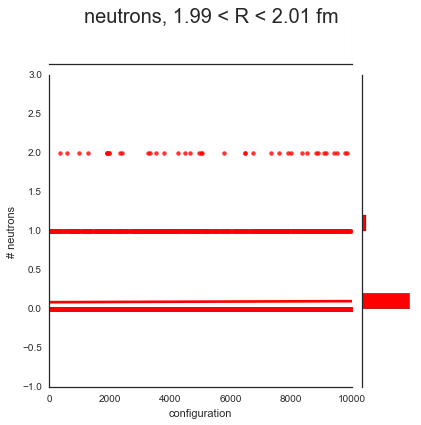

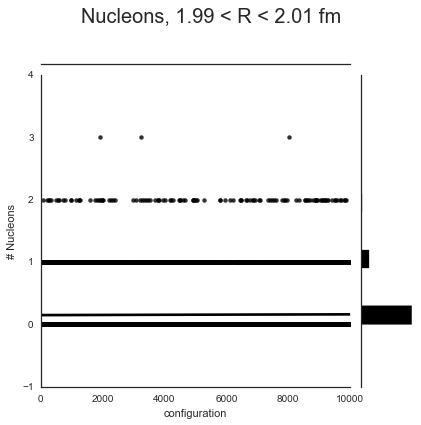

In [44]:
plot_cardiographic_plot( density_2fm_001 , 2 , 0.01 )